<a href="https://colab.research.google.com/github/SulemanShahani/Diabetes-Prediction-using-Naive-Bayes-Classifier/blob/main/naive_bayes_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# **Data Loading**

In [3]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
Train,Test,y_train,y_test = train_test_split(data.drop(['diabetes'], axis=1),data['diabetes'],test_size=0.1,random_state=50)
Train['diabetes'] = y_train
Test['diabetes'] = y_test

# **Normal Distribution**

In [13]:
import numpy as np

def Normal_distribution(x, mean, std):
    prob_density = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    return prob_density


In [16]:
def label_encode(df, columns):
    for column in columns:
        df[column] = pd.factorize(df[column])[0]
    return df

# **Naive_Bayesian**

In [17]:
def Naive_Bayesian(train, test):
    # Identify categorical columns
    categorical_columns = train.select_dtypes(include=['object', 'category']).columns

    # Label encode categorical columns
    train = label_encode(train.copy(), categorical_columns)
    test = label_encode(test.copy(), categorical_columns)

    test['Predicted_Class'] = 0

    for i in range(test.shape[0]):
        range_checker = -1  # Initialize with a value that is lower than any possible likelihood
        signed_class = None

        for j in train['diabetes'].unique():
            cal = 1
            prob_class = len(train[train['diabetes'] == j]) / len(train)

            for feature in train.columns:
                if feature != 'diabetes':
                    mean = train[train['diabetes'] == j][feature].mean()
                    std_div = train[train['diabetes'] == j][feature].std()
                    cal *= Normal_distribution(test.iloc[i][feature], mean, std_div)

            answer = prob_class * cal

            if answer > range_checker:
                signed_class = j
                range_checker = answer

        test.at[i, 'Predicted_Class'] = signed_class

    return test

In [18]:
# Assuming you have Train and Test DataFrames
predicted_test = Naive_Bayesian(Train, Test)
print(predicted_test.head())


       gender    age  hypertension  heart_disease  smoking_history    bmi  \
35363     0.0  62.00           0.0            1.0              0.0  26.46   
43649     0.0   1.88           0.0            0.0              0.0  18.61   
60832     0.0  76.00           0.0            1.0              1.0  27.32   
37399     0.0  80.00           0.0            0.0              2.0  25.70   
61034     0.0  77.00           0.0            0.0              1.0  29.69   

       HbA1c_level  blood_glucose_level  diabetes  Predicted_Class  
35363          4.0                155.0       0.0              0.0  
43649          4.8                100.0       0.0              0.0  
60832          4.5                130.0       0.0              0.0  
37399          5.7                145.0       0.0              0.0  
61034          4.5                160.0       0.0              0.0  


In [19]:
Test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Predicted_Class
35363,Male,62.00,0,1,never,26.46,4.0,155,0,0
43649,Male,1.88,0,0,never,18.61,4.8,100,0,0
60832,Male,76.00,0,1,No Info,27.32,4.5,130,0,0
37399,Male,80.00,0,0,ever,25.70,5.7,145,0,0
61034,Male,77.00,0,0,No Info,29.69,4.5,160,0,0


# **Accuracy Score**

In [11]:
accuracy_score(Test['diabetes'], Test['Predicted_Class'])*100

91.73

In [12]:
confusion_matrix(Test['diabetes'], Test['Predicted_Class'])

array([[9173,    0],
       [ 827,    0]])

In [22]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your original DataFrame with the 'diabetes' column
Train, Test, y_train, y_test = train_test_split(data.drop(['diabetes'], axis=1), data['diabetes'], test_size=0.1, random_state=50)
Train['diabetes'] = y_train
Test['diabetes'] = y_test

# Ensure indices are reset to avoid alignment issues
Train.reset_index(drop=True, inplace=True)
Test.reset_index(drop=True, inplace=True)


In [23]:
def Naive_Bayesian(train, test):
    # Identify categorical columns
    categorical_columns = train.select_dtypes(include=['object', 'category']).columns

    # Label encode categorical columns
    train = label_encode(train.copy(), categorical_columns)
    test = label_encode(test.copy(), categorical_columns)

    test['Predicted_Class'] = 0

    for i in range(test.shape[0]):
        range_checker = -1  # Initialize with a value that is lower than any possible likelihood
        signed_class = None

        for j in train['diabetes'].unique():
            cal = 1
            prob_class = len(train[train['diabetes'] == j]) / len(train)

            for feature in train.columns:
                if feature != 'diabetes':
                    mean = train[train['diabetes'] == j][feature].mean()
                    std_div = train[train['diabetes'] == j][feature].std()
                    cal *= Normal_distribution(test.iloc[i][feature], mean, std_div)

            answer = prob_class * cal

            if answer > range_checker:
                signed_class = j
                range_checker = answer

        test.at[i, 'Predicted_Class'] = signed_class

    return test


In [24]:
predicted_test = Naive_Bayesian(Train, Test)
print(predicted_test.head())


   gender    age  hypertension  heart_disease  smoking_history    bmi  \
0       0  62.00             0              1                0  26.46   
1       0   1.88             0              0                0  18.61   
2       0  76.00             0              1                1  27.32   
3       0  80.00             0              0                2  25.70   
4       0  77.00             0              0                1  29.69   

   HbA1c_level  blood_glucose_level  diabetes  Predicted_Class  
0          4.0                  155         0                1  
1          4.8                  100         0                0  
2          4.5                  130         0                1  
3          5.7                  145         0                0  
4          4.5                  160         0                0  


In [25]:
 from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Extract the actual and predicted labels
y_true = Test['diabetes']
y_pred = predicted_test['Predicted_Class']

# Check lengths
print(len(y_true), len(y_pred))

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))


10000 10000
Accuracy: 0.9049
Precision: 0.4480737018425461
Recall: 0.6469165659008465
F1 Score: 0.5294408708560119
Confusion Matrix:
 [[8514  659]
 [ 292  535]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      9173
           1       0.45      0.65      0.53       827

    accuracy                           0.90     10000
   macro avg       0.71      0.79      0.74     10000
weighted avg       0.92      0.90      0.91     10000



## Detailed Analysis of Predictions

In [26]:
# Display the head of predicted_test for a quick overview
print(predicted_test.head())

# Extract the actual and predicted labels
y_true = Test['diabetes']
y_pred = predicted_test['Predicted_Class']

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))


   gender    age  hypertension  heart_disease  smoking_history    bmi  \
0       0  62.00             0              1                0  26.46   
1       0   1.88             0              0                0  18.61   
2       0  76.00             0              1                1  27.32   
3       0  80.00             0              0                2  25.70   
4       0  77.00             0              0                1  29.69   

   HbA1c_level  blood_glucose_level  diabetes  Predicted_Class  
0          4.0                  155         0                1  
1          4.8                  100         0                0  
2          4.5                  130         0                1  
3          5.7                  145         0                0  
4          4.5                  160         0                0  
Accuracy: 0.9049
Precision: 0.4480737018425461
Recall: 0.6469165659008465
F1 Score: 0.5294408708560119
Confusion Matrix:
 [[8514  659]
 [ 292  535]]
Classification Report:

## Visualize the Results

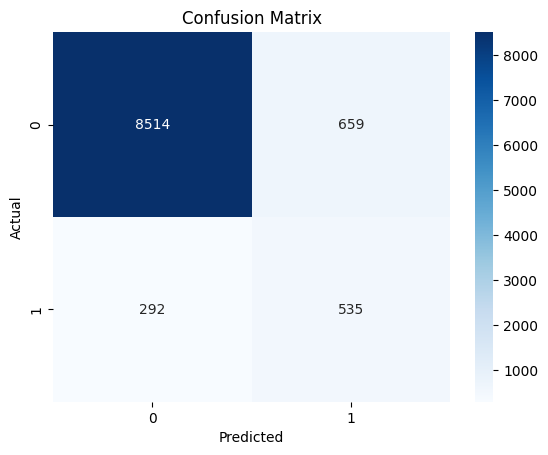

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Cross-Validation
Perform cross-validation to ensure that the model's performance is robust and not dependent on a single train-test split.

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Prepare the data for cross-validation
X = data.drop(['diabetes'], axis=1)
y = data['diabetes']

# Encode categorical features
X = label_encode(X, X.select_dtypes(include=['object', 'category']).columns)

# Perform cross-validation
gnb = GaussianNB()
cv_scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))


Cross-Validation Accuracy Scores: [0.90265 0.9036  0.9066  0.9034  0.90185]
Mean CV Accuracy: 0.9036200000000001
Standard Deviation of CV Accuracy: 0.0016126375910290403


In [30]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Perform cross-validation on the resampled data
cv_scores_resampled = cross_val_score(gnb, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Resampled Cross-Validation Accuracy Scores:", cv_scores_resampled)
print("Mean Resampled CV Accuracy:", np.mean(cv_scores_resampled))
print("Standard Deviation of Resampled CV Accuracy:", np.std(cv_scores_resampled))


Resampled Cross-Validation Accuracy Scores: [0.86349727 0.84150273 0.84346995 0.84087432 0.83928962]
Mean Resampled CV Accuracy: 0.8457267759562841
Standard Deviation of Resampled CV Accuracy: 0.008985650519342244


## Model Improvement
Consider ways to improve the model, such as:

Feature Engineering: Create new features or transform existing ones to provide more information to the model.

### Feature Engineering
Feature engineering involves creating new features or transforming existing ones to provide more information to the model.

 Age Binning: Convert continuous age values into categorical age groups (bins).
 BMI Categories: Convert BMI values into categorical BMI groups (e.g., underweight, normal weight, overweight, obese).
Interaction Features: Create new features by combining existing features (e.g., age * BMI).


In [37]:
# Age Binning
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# BMI Categories
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels, right=False)

# Interaction Feature: Age * BMI
data['age_times_bmi'] = data['age'] * data['bmi']

# Display the head of the modified DataFrame
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,bmi_category,age_times_bmi
0,Female,80.0,0,1,never,25.19,6.6,140,0,51+,Overweight,2015.20
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,51+,Overweight,1475.28
2,Male,28.0,0,0,never,27.32,5.7,158,0,19-35,Overweight,764.96
3,Female,36.0,0,0,current,23.45,5.0,155,0,36-50,Normal,844.20
4,Male,76.0,1,1,current,20.14,4.8,155,0,51+,Normal,1530.64


## Handling Imbalanced Data
If  classes are imbalanced, where one class is significantly more frequent than the other, it can bias the model towards the majority class.

Techniques to handle imbalanced data include:

Resampling: Oversample the minority class or undersample the majority class.
Synthetic Minority Over-sampling Technique (SMOTE): Generate synthetic samples for the minority class to balance the data.

Adjust Class Weights: In some algorithms, like in scikit-learn's Naive Bayes implementation, we can assign higher weights to minority class samples.

In [32]:
from imblearn.over_sampling import SMOTE

# Prepare the data for SMOTE
X = data.drop(['diabetes'], axis=1)
y = data['diabetes']

# Encode categorical features
X_encoded = label_encode(X.copy(), X.select_dtypes(include=['object', 'category']).columns)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Check the class distribution after SMOTE
print(pd.Series(y_resampled).value_counts())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=50)

# Initialize and train Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


diabetes
0    91500
1    91500
Name: count, dtype: int64
Accuracy: 0.8430054644808743
Precision: 0.8122654552636777
Recall: 0.8943133630531696
F1 Score: 0.8513170832686436
Confusion Matrix:
 [[7202 1901]
 [ 972 8225]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      9103
           1       0.81      0.89      0.85      9197

    accuracy                           0.84     18300
   macro avg       0.85      0.84      0.84     18300
weighted avg       0.85      0.84      0.84     18300



## Algorithm Tuning
Tuning hyperparameters can improve the performance of your Naive Bayes classifier. Although Naive Bayes has few hyperparameters to tune, you can still experiment with different variations:

Smoothing Parameter: For Gaussian Naive Bayes (GaussianNB in scikit-learn), the var_smoothing parameter can be adjusted to handle numerical stability.


In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Make predictions with the best model
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)





Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'var_smoothing': 1.519911082952933e-07}
Best Cross-Validation Accuracy: 0.8453551912568307
Accuracy: 0.8462841530054644
Precision: 0.8139260424862313
Recall: 0.899858649559639
F1 Score: 0.8547379292538084


In [34]:
# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[7211 1892]
 [ 921 8276]]


In [35]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      9103
           1       0.81      0.90      0.85      9197

    accuracy                           0.85     18300
   macro avg       0.85      0.85      0.85     18300
weighted avg       0.85      0.85      0.85     18300



By applying these techniques, we can improve the performance of your Naive Bayes classifier:


Handling Imbalanced Data: Ensure that  model is not biased towards the majority class by using techniques like SMOTE.
Algorithm Tuning: Optimize the hyperparameters of Naive Bayes classifier to achieve better performance.